<a href="https://colab.research.google.com/github/xcarslan/cerenonetelent23/blob/main/VeriOnIslemeSon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import os #Dsya ve dizin işlemleri.
import random #rastgele sayılar üretmek.
import shutil #dosya ve dizin üretmek.
from PIL import Image #görüntü işleme işlemleri.
import numpy as np # görüntü verilerini işlemek ve yeniden boyutandırmak.
from skimage.transform import resize  #boyutlandırma
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import cv2

In [5]:
# Klasör yolları
klasor_yollari = [
    '/content/drive/MyDrive/Multiple Sclerosis/Control-Axial',
    '/content/drive/MyDrive/Multiple Sclerosis/Control-Sagittal',
    '/content/drive/MyDrive/Multiple Sclerosis/MS-Axial',
    '/content/drive/MyDrive/Multiple Sclerosis/MS-Sagittal'
]

In [35]:
for yol in klasor_yollari:
    print(yol)

/content/drive/MyDrive/Multiple Sclerosis/Control-Axial
/content/drive/MyDrive/Multiple Sclerosis/Control-Sagittal
/content/drive/MyDrive/Multiple Sclerosis/MS-Axial
/content/drive/MyDrive/Multiple Sclerosis/MS-Sagittal


In [6]:
veri_setleri = {}

# Veri yükleme ve ön işleme
for klasor_yolu in klasor_yollari:
    dosyalar = [dosya for dosya in os.listdir(klasor_yolu) if dosya.endswith('.png')]
    secilen_dosyalar = random.sample(dosyalar, 500)
    veri_setleri[klasor_yolu] = [np.array(Image.open(os.path.join(klasor_yolu, dosya))) for dosya in secilen_dosyalar]

In [36]:
for klasor_yolu, veri_seti in veri_setleri.items():
    print(f"Klasör Yolu: {klasor_yolu}")
    print(f"Toplam Veri Sayısı: {len(veri_seti)}")
    print(f"Örnek Veri: {veri_seti[0]}")  # İlk veriyi göstermek için
    print()

Klasör Yolu: /content/drive/MyDrive/Multiple Sclerosis/Control-Axial
Toplam Veri Sayısı: 500
Örnek Veri: [[[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 ...

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]]

Klasör Yolu: /content/drive/MyDrive/Multiple Sclerosis/Control-Sagittal
Toplam Veri Sayısı: 500
Örnek Veri: [[[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ..

In [8]:
for anahtar in veri_setleri.keys():
    print(f"{anahtar}: {len(veri_setleri[anahtar])} görsel")


/content/drive/MyDrive/Multiple Sclerosis/Control-Axial: 500 görsel
/content/drive/MyDrive/Multiple Sclerosis/Control-Sagittal: 500 görsel
/content/drive/MyDrive/Multiple Sclerosis/MS-Axial: 500 görsel
/content/drive/MyDrive/Multiple Sclerosis/MS-Sagittal: 500 görsel


In [9]:
for klasor in veri_setleri:
    for i, goruntu in enumerate(veri_setleri[klasor]):
        goruntu = goruntu / 255.0  # Normalizasyon
        goruntu = resize(goruntu, (128, 128))  # Yeniden boyutlandırma
        veri_setleri[klasor][i] = goruntu

In [37]:
ilk_klasor = list(veri_setleri.keys())[0]
ilk_goruntu = veri_setleri[ilk_klasor][0]
print(f"İlk Klasör: {ilk_klasor}")
print(f"İlk Görüntü Boyutu: {ilk_goruntu.shape}")
print(f"İlk Görüntü Örneği: {ilk_goruntu}")

İlk Klasör: /content/drive/MyDrive/Multiple Sclerosis/Control-Axial
İlk Görüntü Boyutu: (128, 128, 4)
İlk Görüntü Örneği: [[[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 ...

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]]


In [10]:
# Gürültü azaltma ve segmentasyon fonksiyonları
def gurultu_azalt(goruntu):
    return gaussian_filter(goruntu, sigma=1)

def segmentasyon_yap(goruntu):
    eşik_değeri = 127
    _, segmentasyon = cv2.threshold(goruntu, eşik_değeri, 255, cv2.THRESH_BINARY)
    return segmentasyon


In [38]:
oran = 128
ornek_goruntu = np.random.rand(oran, oran) * 255
ornek_goruntu = ornek_goruntu.astype(np.uint8)

# Gürültü azaltma işlemi
gurultusuz_goruntu = gurultu_azalt(ornek_goruntu)

# Segmentasyon işlemi
segmentasyonlu_goruntu = segmentasyon_yap(ornek_goruntu)

# Sonuçları ekrana yazdırma
print("Örnek Görüntü:")
print(ornek_goruntu)

print("\nGürültüsüz Görüntü:")
print(gurultusuz_goruntu)

print("\nSegmentasyonlu Görüntü:")
print(segmentasyonlu_goruntu)

Örnek Görüntü:
[[123 143 233 ... 116 241 218]
 [219  81  56 ... 159  29 170]
 [  3   7 233 ... 241 140  33]
 ...
 [186  23 176 ... 176 185 238]
 [129 234  28 ... 196 133  61]
 [  6 195  66 ... 155 224 169]]

Gürültüsüz Görüntü:
[[137 140 145 ... 126 162 181]
 [118 115 130 ... 131 135 138]
 [ 90  89 113 ... 130 112  95]
 ...
 [116 109 101 ... 134 162 163]
 [117 119 103 ... 137 158 151]
 [ 95 117 116 ... 144 164 157]]

Segmentasyonlu Görüntü:
[[  0 255 255 ...   0 255 255]
 [255   0   0 ... 255   0 255]
 [  0   0 255 ... 255 255   0]
 ...
 [255   0 255 ... 255 255 255]
 [255 255   0 ... 255 255   0]
 [  0 255   0 ... 255 255 255]]


In [11]:
# Etiketlerin ve görüntülerin ayrılması
tum_goruntuler = []
tum_etiketler = []

for klasor in veri_setleri:
    etiket = klasor.split('/')[-1]
    for goruntu in veri_setleri[klasor]:
        tum_goruntuler.append(goruntu)
        tum_etiketler.append(etiket)

In [39]:
print("İlk Etiket: ", tum_etiketler[0])
print("İlk Görüntü: ", tum_goruntuler[0])

İlk Etiket:  Control-Axial
İlk Görüntü:  [[[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 ...

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]]


In [19]:
# Veri setlerini bölmek
X_train, X_temp, y_train, y_temp = train_test_split(tum_goruntuler, tum_etiketler, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Görüntüleri kaydetme fonksiyonu
def goruntuleri_kaydet(goruntuler, etiketler, hedef_klasor):
    dosya_yollari = []
    for i, (goruntu, etiket) in enumerate(zip(goruntuler, etiketler)):
        goruntu = Image.fromarray((goruntu * 255).astype(np.uint8))
        dosya_adi = f"{etiket}_{i}.png"
        dosya_yolu = os.path.join(hedef_klasor, dosya_adi)
        os.makedirs(os.path.dirname(dosya_yolu), exist_ok=True)
        goruntu.save(dosya_yolu)
        dosya_yollari.append(dosya_yolu)
    return dosya_yollari


In [40]:
# Örnek bir görüntüyü kaydetme
ornek_goruntu = X_train[0]
ornek_etiket = y_train[0]
kaydedilen_dosyalar = goruntuleri_kaydet([ornek_goruntu], [ornek_etiket], 'kaydedilen_goruntuler')

# Kaydedilen dosya yollarını gösterme
print("Kaydedilen Dosya Yolları:")
for dosya_yolu in kaydedilen_dosyalar:
    print(dosya_yolu)

Kaydedilen Dosya Yolları:
kaydedilen_goruntuler/Control-Sagittal_0.png


In [24]:
# Klasörlerin oluşturulması ve görüntülerin kaydedilmesi
train_dir = '/content/drive/MyDrive/Multiple Sclerosis/Train'
val_dir = '/content/drive/MyDrive/Multiple Sclerosis/Validation'
test_dir = '/content/drive/MyDrive/Multiple Sclerosis/Test'

for dir in [train_dir, val_dir, test_dir]:
    if not os.path.exists(dir):
        os.makedirs(dir)

train_paths = goruntuleri_kaydet(X_train, y_train, train_dir)
val_paths = goruntuleri_kaydet(X_val, y_val, val_dir)
test_paths = goruntuleri_kaydet(X_test, y_test, test_dir)


In [41]:
# Kaydedilen dosya yollarını gösterme
print("Eğitim Görüntüleri Dosya Yolları:")
for dosya_yolu in train_paths:
    print(dosya_yolu)

print("\nDoğrulama Görüntüleri Dosya Yolları:")
for dosya_yolu in val_paths:
    print(dosya_yolu)

print("\nTest Görüntüleri Dosya Yolları:")
for dosya_yolu in test_paths:
    print(dosya_yolu)

Eğitim Görüntüleri Dosya Yolları:
/content/drive/MyDrive/Multiple Sclerosis/Train/Control-Sagittal_0.png
/content/drive/MyDrive/Multiple Sclerosis/Train/MS-Axial_1.png
/content/drive/MyDrive/Multiple Sclerosis/Train/Control-Axial_2.png
/content/drive/MyDrive/Multiple Sclerosis/Train/Control-Axial_3.png
/content/drive/MyDrive/Multiple Sclerosis/Train/MS-Sagittal_4.png
/content/drive/MyDrive/Multiple Sclerosis/Train/Control-Sagittal_5.png
/content/drive/MyDrive/Multiple Sclerosis/Train/Control-Axial_6.png
/content/drive/MyDrive/Multiple Sclerosis/Train/MS-Sagittal_7.png
/content/drive/MyDrive/Multiple Sclerosis/Train/Control-Sagittal_8.png
/content/drive/MyDrive/Multiple Sclerosis/Train/Control-Sagittal_9.png
/content/drive/MyDrive/Multiple Sclerosis/Train/MS-Sagittal_10.png
/content/drive/MyDrive/Multiple Sclerosis/Train/Control-Axial_11.png
/content/drive/MyDrive/Multiple Sclerosis/Train/MS-Axial_12.png
/content/drive/MyDrive/Multiple Sclerosis/Train/Control-Axial_13.png
/content/drive

In [25]:
def klasor_icerik_sayisi(klasor_yolu):
    try:
        # Klasördeki dosya sayısını sayar
        dosya_sayisi = len([dosya for dosya in os.listdir(klasor_yolu) if dosya.endswith('.png')])
        print(f"{klasor_yolu}: {dosya_sayisi} adet dosya")
    except FileNotFoundError:
        print(f"Hata: {klasor_yolu} bulunamadı")

# Her bir klasördeki görüntü sayısını göster
klasor_icerik_sayisi(train_dir)
klasor_icerik_sayisi(val_dir)
klasor_icerik_sayisi(test_dir)


/content/drive/MyDrive/Multiple Sclerosis/Train: 1200 adet dosya
/content/drive/MyDrive/Multiple Sclerosis/Validation: 400 adet dosya
/content/drive/MyDrive/Multiple Sclerosis/Test: 400 adet dosya


In [26]:
# Dosyaların ilgili klasörlere kopyalanması
def dosyalari_kopyala(dosya_yollari, hedef_klasor):
    for dosya_yolu in dosya_yollari:
        hedef_dosya_yolu = os.path.join(hedef_klasor, os.path.basename(dosya_yolu))
        shutil.copy(dosya_yolu, hedef_dosya_yolu)

dosyalari_kopyala(train_paths, test_dir)
dosyalari_kopyala(val_paths, train_dir)
dosyalari_kopyala(test_paths, val_dir)

In [42]:
# Kopyalanan dosyaların sayısını gösterme
print("Eğitim Klasöründeki Dosya Sayısı:", len(os.listdir(train_dir)))
print("Doğrulama Klasöründeki Dosya Sayısı:", len(os.listdir(val_dir)))
print("Test Klasöründeki Dosya Sayısı:", len(os.listdir(test_dir)))

Eğitim Klasöründeki Dosya Sayısı: 1507
Doğrulama Klasöründeki Dosya Sayısı: 702
Test Klasöründeki Dosya Sayısı: 1496


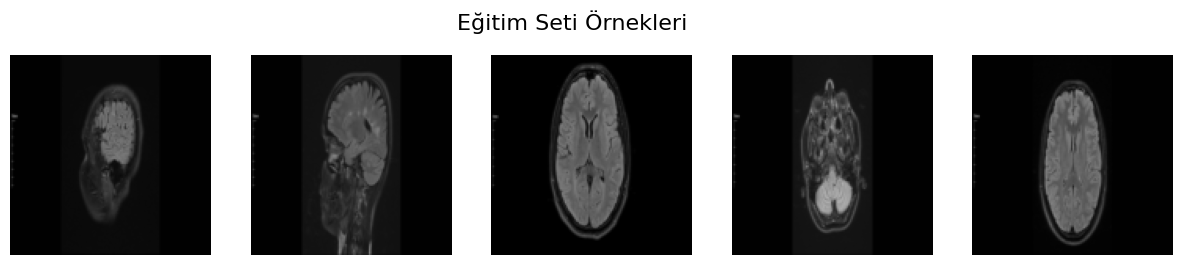

In [27]:
# Görselleştirme
def goruntuleri_goster(goruntuler, baslik, num_samples=5):
    secilen_ornekler = random.sample(goruntuler, num_samples)
    plt.figure(figsize=(15, 3))
    plt.suptitle(baslik, fontsize=16)
    for i, ornek in enumerate(secilen_ornekler):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(ornek, cmap='gray')
        plt.axis('off')
    plt.show()

goruntuleri_goster(X_train, 'Eğitim Seti Örnekleri')

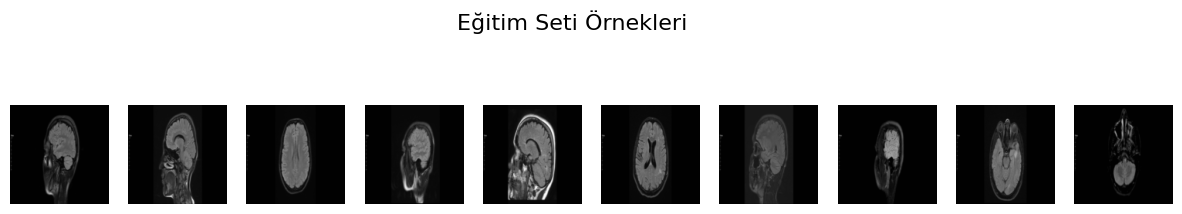

In [43]:
goruntuleri_goster(X_train, 'Eğitim Seti Örnekleri', num_samples=10)


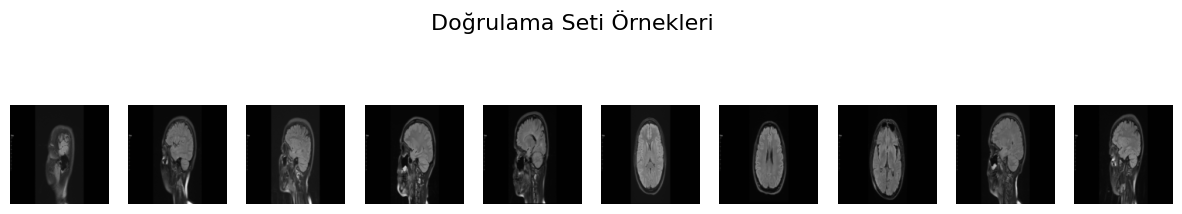

In [44]:
goruntuleri_goster(X_val, 'Doğrulama Seti Örnekleri', num_samples=10)


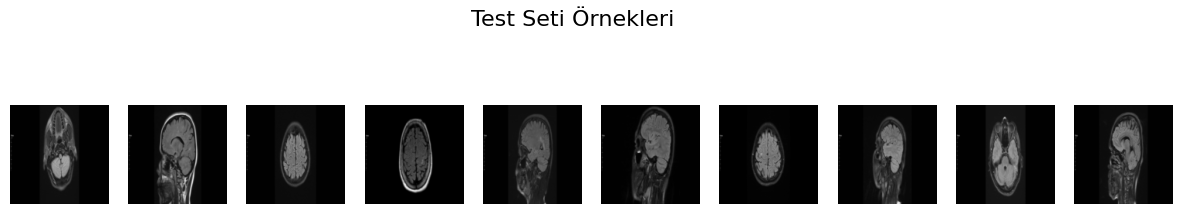

In [45]:
goruntuleri_goster(X_test, 'Test Seti Örnekleri', num_samples=10)


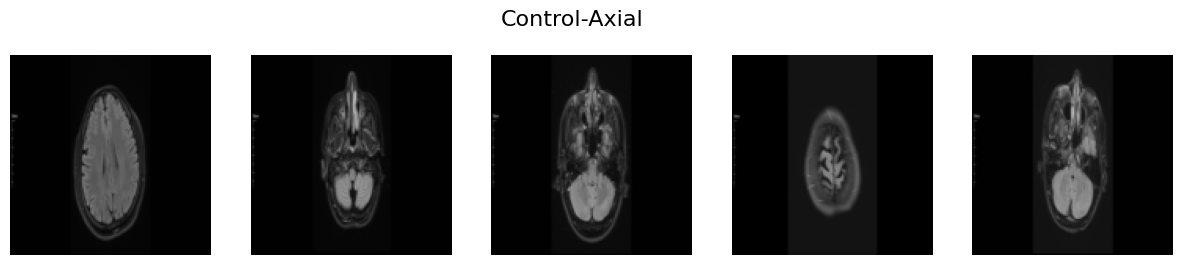

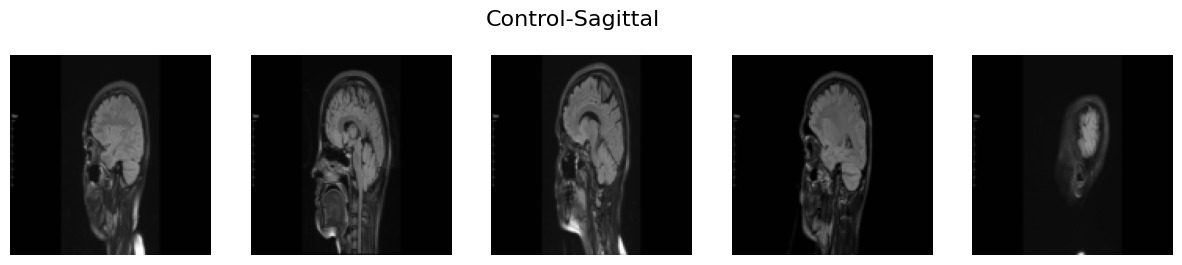

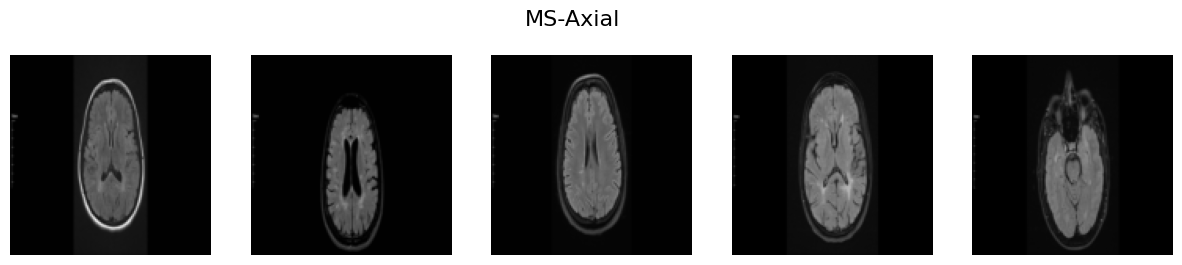

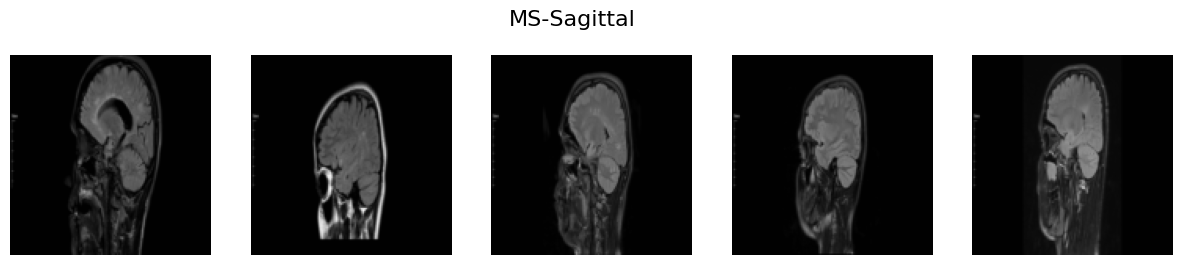

In [28]:
import matplotlib.pyplot as plt
import random

# Her bir klasör için beş görüntüyü görselleştirme
num_samples_per_class = 5  # Her klasörden görselleştirilecek örnek sayısı

# Control-Axial için
secilen_ornekler = random.sample(veri_setleri['/content/drive/MyDrive/Multiple Sclerosis/Control-Axial'], num_samples_per_class)
plt.figure(figsize=(15, 3))
plt.suptitle('Control-Axial', fontsize=16)
for i, ornek in enumerate(secilen_ornekler):
    plt.subplot(1, num_samples_per_class, i + 1)
    plt.imshow(ornek, cmap='gray')
    plt.axis('off')
plt.show()

# Control-Sagittal için
secilen_ornekler = random.sample(veri_setleri['/content/drive/MyDrive/Multiple Sclerosis/Control-Sagittal'], num_samples_per_class)
plt.figure(figsize=(15, 3))
plt.suptitle('Control-Sagittal', fontsize=16)
for i, ornek in enumerate(secilen_ornekler):
    plt.subplot(1, num_samples_per_class, i + 1)
    plt.imshow(ornek, cmap='gray')
    plt.axis('off')
plt.show()

# MS-Axial için
secilen_ornekler = random.sample(veri_setleri['/content/drive/MyDrive/Multiple Sclerosis/MS-Axial'], num_samples_per_class)
plt.figure(figsize=(15, 3))
plt.suptitle('MS-Axial', fontsize=16)
for i, ornek in enumerate(secilen_ornekler):
    plt.subplot(1, num_samples_per_class, i + 1)
    plt.imshow(ornek, cmap='gray')
    plt.axis('off')
plt.show()

# MS-Sagittal için
secilen_ornekler = random.sample(veri_setleri['/content/drive/MyDrive/Multiple Sclerosis/MS-Sagittal'], num_samples_per_class)
plt.figure(figsize=(15, 3))
plt.suptitle('MS-Sagittal', fontsize=16)
for i, ornek in enumerate(secilen_ornekler):
    plt.subplot(1, num_samples_per_class, i + 1)
    plt.imshow(ornek, cmap='gray')
    plt.axis('off')
plt.show()

In [29]:
print("Eğitim seti boyutu:", len(X_train))
print("Doğrulama seti boyutu:", len(X_val))
print("Test seti boyutu:", len(X_test))

Eğitim seti boyutu: 1200
Doğrulama seti boyutu: 400
Test seti boyutu: 400


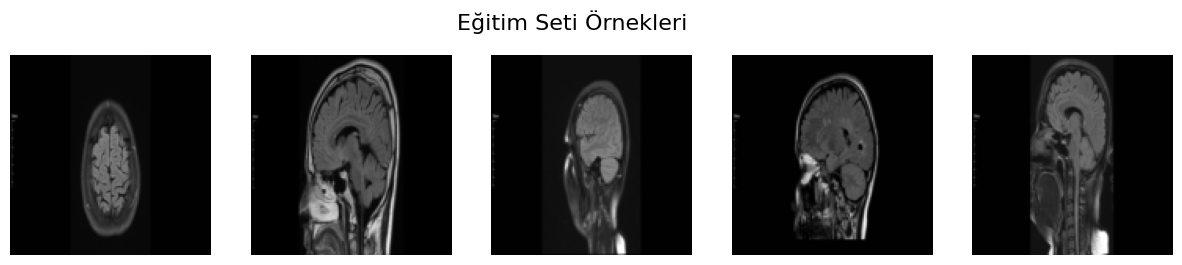

In [31]:
import matplotlib.pyplot as plt
import random

def goruntuleri_goster(goruntuler, baslik, num_samples=5):
    secilen_ornekler = random.sample(goruntuler, num_samples)
    plt.figure(figsize=(15, 3))
    plt.suptitle(baslik, fontsize=16)
    for i, ornek in enumerate(secilen_ornekler):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(ornek, cmap='gray')
        plt.axis('off')
    plt.show()

# Eğitim setinden örnekleri görselleştirme
goruntuleri_goster(X_train, 'Eğitim Seti Örnekleri')

# Doğrulama ve test setlerinden de benzer şekilde örnekleri görselleştirebilirsiniz.

In [32]:
# Eğitim setindeki ilk 5 görüntü ve etiketi göster
for i in range(5):
    print(f"Eğitim Görüntü {i+1}: ", X_train[i])
    print(f"Eğitim Etiketi {i+1}: ", y_train[i])

Eğitim Görüntü 1:  [[[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 ...

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]]
Eğitim Etiketi 1:  Control-Sagittal
Eğitim Görüntü 2:  [[[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  

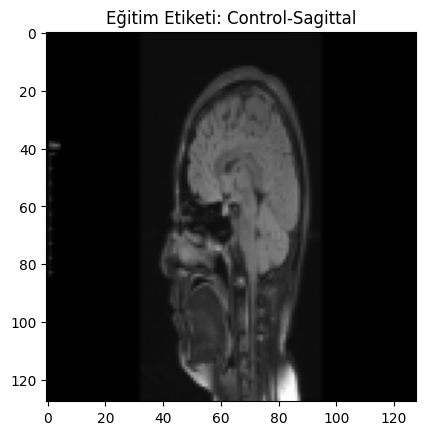

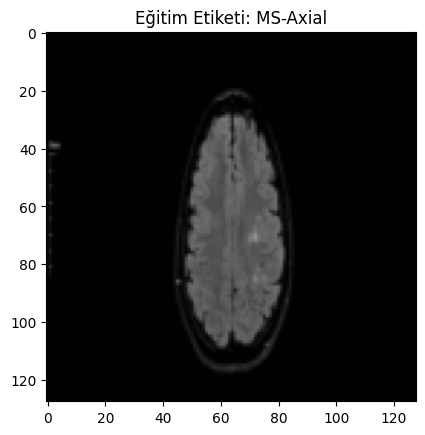

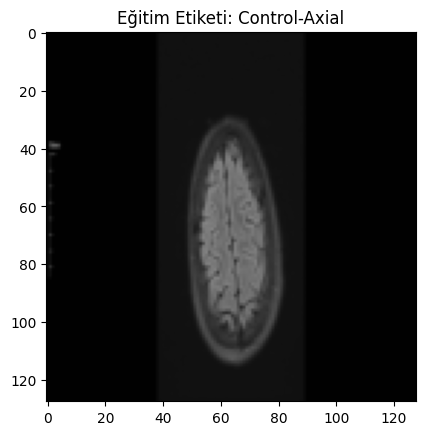

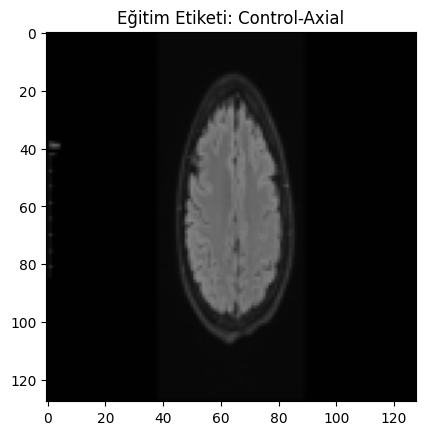

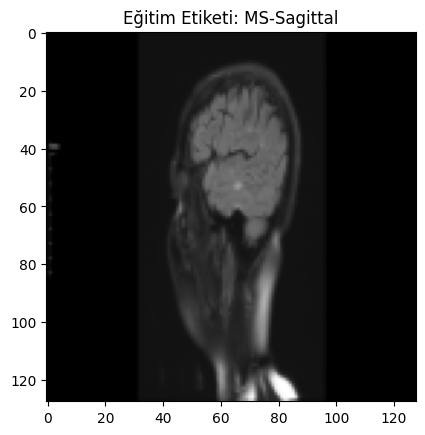

In [33]:
# @title
import matplotlib.pyplot as plt

# Eğitim setindeki ilk 5 görüntüyü görselleştir
for i in range(5):
    plt.imshow(X_train[i], cmap='gray')  # Görüntüler gri tonlamalıysa cmap='gray' kullanın
    plt.title(f"Eğitim Etiketi: {y_train[i]}")
    plt.show()

In [34]:
for dir in [train_dir, val_dir, test_dir]:
    print(f"Klasör: {dir}")
    print("İçindekiler:", os.listdir(dir))
    print()

Klasör: /content/drive/MyDrive/Multiple Sclerosis/Train
İçindekiler: ['Control-Sagittal_0.png', 'MS-Axial_1.png', 'Control-Axial_2.png', 'Control-Axial_3.png', 'MS-Sagittal_4.png', 'Control-Sagittal_5.png', 'Control-Axial_6.png', 'MS-Sagittal_7.png', 'Control-Sagittal_8.png', 'Control-Sagittal_9.png', 'MS-Sagittal_10.png', 'Control-Axial_11.png', 'MS-Axial_12.png', 'Control-Axial_13.png', 'MS-Sagittal_14.png', 'MS-Axial_15.png', 'MS-Sagittal_16.png', 'MS-Sagittal_17.png', 'MS-Axial_18.png', 'MS-Axial_19.png', 'MS-Sagittal_20.png', 'Control-Sagittal_21.png', 'MS-Sagittal_22.png', 'Control-Sagittal_23.png', 'Control-Sagittal_24.png', 'Control-Axial_25.png', 'MS-Sagittal_26.png', 'MS-Axial_27.png', 'Control-Axial_28.png', 'Control-Sagittal_29.png', 'MS-Axial_30.png', 'Control-Axial_31.png', 'Control-Sagittal_32.png', 'Control-Sagittal_33.png', 'Control-Sagittal_34.png', 'Control-Sagittal_35.png', 'Control-Axial_36.png', 'MS-Axial_37.png', 'Control-Axial_38.png', 'MS-Axial_39.png', 'Contro

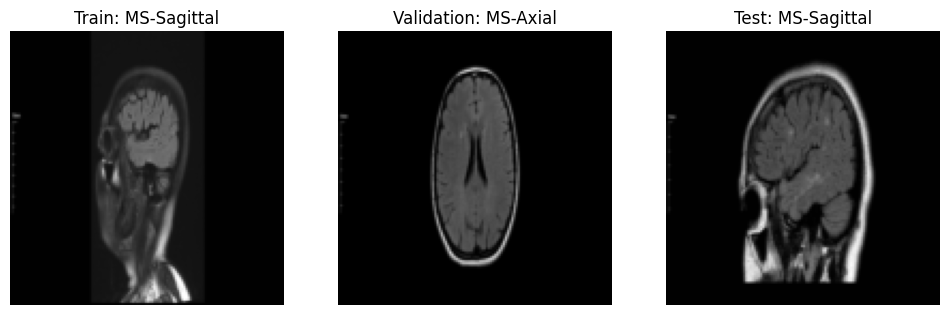

In [53]:
import random

# Rastgele bir görüntü seçme fonksiyonu
def rastgele_goruntu_al(goruntuler, etiketler):
    indeks = random.randint(0, len(goruntuler) - 1)
    return goruntuler[indeks], etiketler[indeks]

# "train" veri kümesinden rastgele bir görüntü al
rastgele_train_goruntu, rastgele_train_etiket = rastgele_goruntu_al(X_train, y_train)

# "validation" veri kümesinden rastgele bir görüntü al
rastgele_val_goruntu, rastgele_val_etiket = rastgele_goruntu_al(X_val, y_val)

# "test" veri kümesinden rastgele bir görüntü al
rastgele_test_goruntu, rastgele_test_etiket = rastgele_goruntu_al(X_test, y_test)

# Görselleştirme
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# "train" veri kümesinden rastgele görüntü
plt.subplot(131)
plt.imshow(rastgele_train_goruntu, cmap='gray')
plt.title(f"Train: {rastgele_train_etiket}")
plt.axis('off')

# "validation" veri kümesinden rastgele görüntü
plt.subplot(132)
plt.imshow(rastgele_val_goruntu, cmap='gray')
plt.title(f"Validation: {rastgele_val_etiket}")
plt.axis('off')

# "test" veri kümesinden rastgele görüntü
plt.subplot(133)
plt.imshow(rastgele_test_goruntu, cmap='gray')
plt.title(f"Test: {rastgele_test_etiket}")
plt.axis('off')

plt.show()
